In [1]:
import tensorflow.keras as keras

In [2]:
import tensorflow as tf

print(tf.__version__)

1.13.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

samples= 5
tipo = 3# np.random.randint(4)
index_image = np.random.randint(100000)  #2


# ========== EXTRACCIÓN DE DATOS ==============
archivo = open('/home/endredra/Desktop/Int_proj/EL4106-1oProyecto/dataset/HiTS2013_100k_samples(4_channels)_images_labels.pkl',"rb")
example_dict= pickle.load(archivo)
print(example_dict['labels'])
print(example_dict['images'].shape)

[0 0 0 ... 0 0 0]
(100000, 21, 21, 4)


In [4]:
xx = example_dict['images'][:, :, :, tipo]
yy= example_dict['labels']
print(xx[:75000].shape)
print(xx[75000:].shape)
print(yy[:75000].shape[0])
print(yy[75000:].shape[0])
print(yy[:100])
#database to train
x_train=xx[:75000]
y_train=yy[:75000]

#database to test
x_test=xx[75000:]
y_test=yy[75000:]

(75000, 21, 21)
(25000, 21, 21)
75000
25000
[0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0]


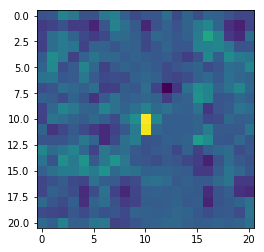

In [5]:
%matplotlib inline
plt.imshow(x_train[0])#,cmap=plt.cm.binary)
plt.show()

In [6]:
print('falso: ', y_train[0])

falso:  0


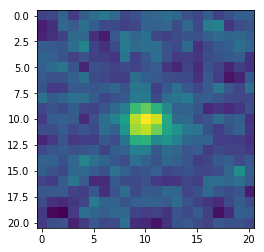

In [7]:
%matplotlib inline
plt.imshow(x_train[4])#,cmap=plt.cm.binary)
plt.show()

In [8]:
print('positivo: ', y_train[4])

positivo:  1


In [11]:
############ modelo #################

model = tf.keras.models.Sequential()

#capas

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#entrenar
epocas=3

model.fit(x_train, y_train, epochs=epocas)

Epoch 1/3
75000/75000 [==============================] - 6s 78us/sample - loss: 0.2100 - acc: 0.9172
Epoch 2/3
75000/75000 [==============================] - 5s 73us/sample - loss: 0.1589 - acc: 0.9412
Epoch 3/3
75000/75000 [==============================] - 5s 73us/sample - loss: 0.1443 - acc: 0.9479


In [21]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('\n\nLoss:', val_loss*100,'%\n\n')
print('Accuracy:', val_acc*100,'%\n\n')

25000/25000 [==============================] - 1s 26us/sample - loss: 0.1626 - acc: 0.9374


Loss: 16.262631972670555 %


Accuracy: 93.73999834060669 %




In [14]:
model.save('super_nova_class.model')

In [15]:
new_model = tf.keras.models.load_model('super_nova_class.model')

In [16]:
predictions = new_model.predict(x_test)
print(predictions)

[[3.3754292e-01 6.6245711e-01]
 [8.5743153e-03 9.9142563e-01]
 [7.1257330e-02 9.2874265e-01]
 ...
 [9.5104295e-01 4.8956975e-02]
 [9.9999046e-01 9.5140731e-06]
 [9.9999976e-01 2.1446731e-07]]


In [17]:
for i in range(20):
    print('prediction: ',np.argmax(predictions[i]), ' -----  true class: ', y_test[i])
    

prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0


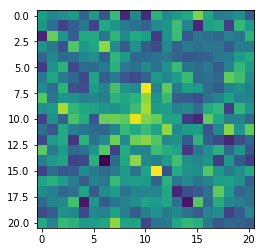

 imagem: 0 ----- tipo: 3 ----- class: 1 ----- prediction: 1 


In [26]:
%matplotlib inline
index_img=0
plt.figure("imagem: {} , tipo: {} , class: {}".format(index_img, tipo, y_test[index_img]))
plt.imshow(x_test[0])#,cmap=plt.cm.binary)


plt.show()
print(" imagem: {} ----- tipo: {} ----- class: {} ----- prediction: {} ".format(index_img, tipo, y_test[index_img], np.argmax(predictions[index_img])))


In [63]:
imagene_index=50


test_predict = model.predict(x_test[imagene_index:imagene_index+1])
print('prediction test: ', test_predict)
print('prediction class test: ', np.argmax(test_predict), 'percentage: ', "%.2f" % (test_predict[0][np.argmax(test_predict)]*100), '%')

prediction test:  [[0.20188943 0.79811054]]
prediction class test:  1 percentage:  79.81 %
